In [1]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Set up Splinter and website to scrape
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

html = browser.html
html_soup = soup(html, 'html.parser')

In [3]:
#Find the table to scrape
table = html_soup.find_all('tr', class_='data-row')

In [4]:
#Scraping process
mars_temperature = []
for row in table:
    row_data = row.find_all('td')
    row_dataupdt = [col.text for col in row_data]
    mars_temperature.append(row_dataupdt)
print(mars_temperature)

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], ['172

In [5]:
#Transforming scraped data into Data Frame
mars_temperature_df = pd.DataFrame(mars_temperature, columns = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"])
mars_temperature_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [6]:
#Review data types
mars_temperature_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [7]:
#Convert datatypes for terrestrial date, id, sol, ls, month, min_temp, pressure
mars_temperature_df["terrestrial_date"]= pd.to_datetime(mars_temperature_df["terrestrial_date"])
mars_temperature_df = mars_temperature_df.astype({"id" : "int", "sol": "int", "ls": "int", "month": "int"})
mars_temperature_df = mars_temperature_df.astype({"min_temp" : "float", "pressure": "float"})
mars_temperature_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [8]:
#How many months exist on Mars?
mars_temperature_df["month"].unique()
#12 months

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5])

In [9]:
#How many Martian (and not Earth) days worth of data exist in the scraped dataset?
mars_days = mars_temperature_df["sol"].max() - mars_temperature_df["sol"].min()
mars_days
#1,967

1967

In [10]:
#What are the coldest and the warmest months on Mars (at the location of Curiosity)? 
#Get the answer by averaging the minimum daily temperature of all the months. 
#Plot the results as a bar chart.

In [11]:
temperature = mars_temperature_df.groupby(["month"])["min_temp"].mean()
temperature_df = pd.DataFrame(temperature)
temperature_df

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


In [12]:
temperature.min()

-83.30729166666667

In [13]:
temperature.max()

-68.38297872340425

In [14]:
#month 3 is the coldest whereas month 8 is the warmest

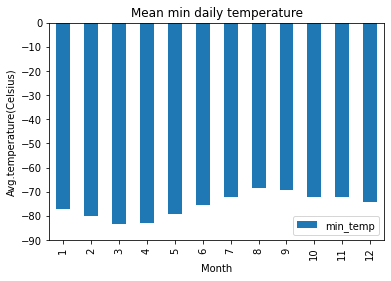

In [15]:
temperature_df.plot.bar(y = "min_temp")
plt.ylim(-90,0)
plt.xlabel("Month")
plt.ylabel("Avg.temperature(Celsius)")
plt.title("Mean min daily temperature")
plt.legend()
plt.show()

In [16]:
#Which months have the lowest and the highest atmospheric pressure on Mars?
#Get the answer by averaging the daily atmospheric pressure of all the months.
#Plot the results as a bar chart

In [17]:
pressure = mars_temperature_df.groupby(["month"])["pressure"].mean()
pressure_df = pd.DataFrame(pressure)
pressure_df

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


In [18]:
pressure.min()

745.0544217687075

In [19]:
pressure.max()

913.3059701492538

In [20]:
#month 6 is has the lowest whereas month 9 the highest pressure

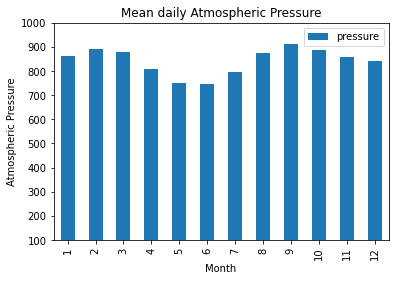

In [21]:
pressure_df.plot.bar(y = "pressure")
plt.ylim(100,1000)
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")
plt.title("Mean daily Atmospheric Pressure")
plt.legend()
plt.show()

In [22]:
#About how many terrestrial (Earth) days exist in a Martian year? 
#That is, in the time that Mars circles the Sun once, how many days elapse on Earth? 
#Visually estimate the result by plotting the daily minimum temperature.

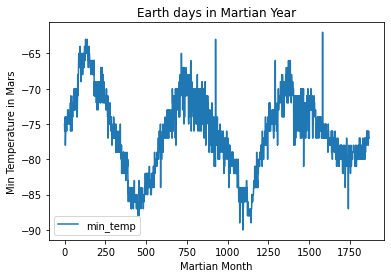

In [23]:
martian_days = mars_temperature_df.plot(y = "min_temp")
plt.xlabel("Martian Month")
plt.ylabel("Min Temperature in Mars")
plt.title("Earth days in Martian Year")
plt.legend
plt.show()

In [24]:
#Calcualte total Earth Days
earth_days = mars_temperature_df["terrestrial_date"].count()
earth_days

1867

In [25]:
#from the visualization, we can identify 3 Martian yearly cycles and we have 1,867 earth days.
#We can derive that there are (1,867/3) = aprox 622 earth days per 1 Martian year

In [26]:
#export DF to CSV
mars_temperature_df.to_csv("Results/mars_temperature.csv", index=False)

In [27]:
browser.quit()